In [1]:
from fer import FER
import cv2
from textblob import TextBlob
import speech_recognition as sr
import sounddevice as sd
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical 
import tkinter as tk
from tkinter import messagebox

pygame 2.6.0 (SDL 2.28.4, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Cleaning to remove HTML tags, punctuation, and other unwanted characters
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

In [7]:
# Load the Twitter dataset
twitter_data = pd.read_csv("/Users/paniztafreshi/Desktop/AI/Deep Learning/panic_attack/datasets/Twitter_Data.csv")

# Handle missing values in the 'clean_text' column
twitter_data['clean_text'].fillna('', inplace=True)

# Clean the text in the 'clean_text' column
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# Apply the text cleaning function to the 'clean_text' column
twitter_data['cleaned_tweet'] = twitter_data['clean_text'].apply(clean_text)

# Ensure sentiment encoding is applied correctly
# Map the sentiment labels to numerical values (negative -> 0, neutral -> 1, positive -> 2)
twitter_data['sentiment_encoded'] = twitter_data['category'].map({-1.0: 0, 0.0: 1, 1.0: 2})

# Verify the changes
twitter_data[['category', 'sentiment_encoded']].head()

# --- Train-Test Split for Twitter Dataset ---
X_twitter = twitter_data['cleaned_tweet']
y_twitter = twitter_data['sentiment_encoded']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)

# Convert the text data into numerical features using TF-IDF for Twitter
tfidf_vectorizer_twitter = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X_train_twitter_tfidf = tfidf_vectorizer_twitter.fit_transform(X_train_twitter)  # Fit and transform on the training data
X_test_twitter_tfidf = tfidf_vectorizer_twitter.transform(X_test_twitter)  # Transform on the test data

# Convert the labels to categorical (for multi-class classification)
y_train_twitter_cat = to_categorical(y_train_twitter, num_classes=3)  # Twitter train (3 classes)
y_test_twitter_cat = to_categorical(y_test_twitter, num_classes=3)  # Twitter test (3 classes)

# --- Build the Neural Network Model for Twitter ---
model_twitter = Sequential([
    Dense(128, activation='relu', input_dim=X_train_twitter_tfidf.shape[1]),  # Input layer (5,000 features)
    Dropout(0.2), 
    Dense(64, activation='relu'),  
    Dropout(0.2),  
    Dense(3, activation='softmax')  
])

# Compile the model
model_twitter.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping_twitter = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model for Twitter
history_twitter = model_twitter.fit(X_train_twitter_tfidf, y_train_twitter_cat, epochs=10, batch_size=64, validation_data=(X_test_twitter_tfidf, y_test_twitter_cat), callbacks=[early_stopping_twitter])

# Evaluate the model on the test set (Twitter)
loss_twitter, accuracy_twitter = model_twitter.evaluate(X_test_twitter_tfidf, y_test_twitter_cat)
print("Test Loss: ", loss_twitter)
print("Test Accuracy: ", accuracy_twitter)
model_twitter.save("twitter_sentiment_model.h5")


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  twitter_data['clean_text'].fillna('', inplace=True)

  arr = np.asarray(values, dtype=dtype)

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7757 - loss: 0.5326 - val_accuracy: 0.9320 - val_loss: 0.2345
Epoch 2/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9424 - loss: 0.1956 - val_accuracy: 0.9385 - val_loss: 0.2183
Epoch 3/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9568 - loss: 0.1474 - val_accuracy: 0.9406 - val_loss: 0.2267
Epoch 4/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.1071 - val_accuracy: 0.9397 - val_loss: 0.2371
Epoch 5/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9786 - loss: 0.0717 - val_accuracy: 0.9373 - val_loss: 0.2742
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.9369 - loss: 0.2248


Test Loss:  0.21825948357582092
Test Accuracy:  0.9384586811065674


In [13]:
# Load the IMDB dataset
imdb_data = pd.read_csv("/Users/paniztafreshi/Desktop/AI/Deep Learning/panic_attack/datasets/IMDB_Dataset.csv")

# Clean the text in the 'review' column
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# Apply the text cleaning function to the 'review' column
imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_text)

# Convert sentiment labels ('positive' -> 1, 'negative' -> 0)
imdb_data['sentiment_encoded'] = imdb_data['sentiment'].map({'positive': 1, 'negative': 0})

# --- Train-Test Split for IMDB Dataset ---
X_imdb = imdb_data['cleaned_review']
y_imdb = imdb_data['sentiment_encoded']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(X_imdb, y_imdb, test_size=0.2, random_state=42)

# Convert the text data into numerical features using TF-IDF for IMDB
tfidf_vectorizer_imdb = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X_train_imdb_tfidf = tfidf_vectorizer_imdb.fit_transform(X_train_imdb)  # Fit and transform on the training data
X_test_imdb_tfidf = tfidf_vectorizer_imdb.transform(X_test_imdb)  # Transform on the test data

# Convert the labels to categorical (for binary classification)
y_train_imdb_cat = to_categorical(y_train_imdb, num_classes=2)  # IMDB train (2 classes)
y_test_imdb_cat = to_categorical(y_test_imdb, num_classes=2)  # IMDB test (2 classes)

# --- Build the Neural Network Model for IMDB ---
model_imdb = Sequential([
    Dense(128, activation='relu', input_dim=X_train_imdb_tfidf.shape[1]),  # Input layer (5,000 features)
    Dropout(0.2),  
    Dense(64, activation='relu'),  
    Dropout(0.2),  
    Dense(2, activation='softmax')  
])

# Compile the model
model_imdb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping_imdb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model for IMDB
history_imdb = model_imdb.fit(X_train_imdb_tfidf, y_train_imdb_cat, epochs=10, batch_size=64, validation_data=(X_test_imdb_tfidf, y_test_imdb_cat), callbacks=[early_stopping_imdb])

# Evaluate the model on the test set (IMDB)
loss_imdb, accuracy_imdb = model_imdb.evaluate(X_test_imdb_tfidf, y_test_imdb_cat)
print("Test Loss: ", loss_imdb)
print("Test Accuracy: ", accuracy_imdb)
model_imdb.save("imdb_sentiment_model.h5")

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8198 - loss: 0.4066 - val_accuracy: 0.8839 - val_loss: 0.2670
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9179 - loss: 0.2153 - val_accuracy: 0.8892 - val_loss: 0.2662
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9370 - loss: 0.1680 - val_accuracy: 0.8860 - val_loss: 0.2958
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9692 - loss: 0.0971 - val_accuracy: 0.8771 - val_loss: 0.3410
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9867 - loss: 0.0449 - val_accuracy: 0.8767 - val_loss: 0.4815
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8903 - loss: 0.2637


Test Loss:  0.2662428021430969
Test Accuracy:  0.88919997215271


In [9]:
# Load the Reddit dataset 
reddit_data = pd.read_csv("/Users/paniztafreshi/Desktop/AI/Deep Learning/panic_attack/datasets/Reddit_Data.csv")

# Clean the text in the 'clean_comment' column
def clean_text(text):
    # Ensure text is a string (convert any non-string values to an empty string)
    if not isinstance(text, str):
        text = str(text)  # Convert to string if it's not already a string
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# Apply the text cleaning function to the 'clean_comment' column
reddit_data['cleaned_comment'] = reddit_data['clean_comment'].apply(lambda x: clean_text(x) if isinstance(x, str) else "")

# Ensure the sentiment encoding is applied correctly
reddit_data['sentiment_encoded'] = reddit_data['category'].map({-1: 0, 1: 1})

# Verify the changes
reddit_data[['category', 'sentiment_encoded']].head()
# --- Train-Test Split for Reddit Dataset ---
X_reddit = reddit_data['cleaned_comment']
y_reddit = reddit_data['sentiment_encoded']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_reddit, X_test_reddit, y_train_reddit, y_test_reddit = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)

# Convert the text data into numerical features using TF-IDF for Reddit
tfidf_vectorizer_reddit = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X_train_reddit_tfidf = tfidf_vectorizer_reddit.fit_transform(X_train_reddit)  # Fit and transform on the training data
X_test_reddit_tfidf = tfidf_vectorizer_reddit.transform(X_test_reddit)  # Transform on the test data

# Convert the labels to categorical (for binary classification)
y_train_reddit_cat = to_categorical(y_train_reddit, num_classes=2)  # Reddit train (2 classes)
y_test_reddit_cat = to_categorical(y_test_reddit, num_classes=2)  # Reddit test (2 classes)

# --- Build the Neural Network Model for Reddit ---
model_reddit = Sequential([
    Dense(128, activation='relu', input_dim=X_train_reddit_tfidf.shape[1]),  # Input layer (5,000 features)
    Dropout(0.2),  
    Dense(64, activation='relu'),  
    Dropout(0.2), 
    Dense(2, activation='softmax')  
])

# Compile the model
model_reddit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping_reddit = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model for Reddit
history_reddit = model_reddit.fit(X_train_reddit_tfidf, y_train_reddit_cat, epochs=10, batch_size=64, validation_data=(X_test_reddit_tfidf, y_test_reddit_cat), callbacks=[early_stopping_reddit])

# Evaluate the model on the test set (Reddit)
loss_reddit, accuracy_reddit = model_reddit.evaluate(X_test_reddit_tfidf, y_test_reddit_cat)
print("Test Loss: ", loss_reddit)
print("Test Accuracy: ", accuracy_reddit)
model_reddit.save("reddit_sentiment_model.h5")

  arr = np.asarray(values, dtype=dtype)

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7368 - loss: 0.5017 - val_accuracy: 0.8917 - val_loss: 0.2762
Epoch 2/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9356 - loss: 0.1821 - val_accuracy: 0.9038 - val_loss: 0.2541
Epoch 3/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1099 - val_accuracy: 0.9034 - val_loss: 0.2828
Epoch 4/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0593 - val_accuracy: 0.9063 - val_loss: 0.3233
Epoch 5/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9929 - loss: 0.0282 - val_accuracy: 0.9082 - val_loss: 0.3680
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.9087 - loss: 0.2454


Test Loss:  0.25405654311180115
Test Accuracy:  0.9037584066390991


In [21]:
# Standardize text and label columns
twitter_data.rename(columns={'cleaned_tweet': 'text', 'sentiment_encoded': 'labels'}, inplace=True)
imdb_data.rename(columns={'cleaned_review': 'text', 'sentiment': 'labels'}, inplace=True)
reddit_data.rename(columns={'cleaned_comment': 'text', 'sentiment': 'labels'}, inplace=True)

twitter_data = twitter_data[['text', 'labels']]
imdb_data = imdb_data[['text', 'labels']]
reddit_data = reddit_data[['text', 'labels']]

# Combine the datasets
combined_df = pd.concat([twitter_data, imdb_data, reddit_data], ignore_index=True)

# Verify the combined DataFrame
print(combined_df.head())
print(combined_df.columns)

KeyError: "['labels'] not in index"

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(combined_df['text'])

sequences = tokenizer.texts_to_sequences(combined_df['text'])
padded_sequences = pad_sequences(sequences, maxlen=100)


KeyError: 'text'

In [12]:
sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}

input_text = "I am feeling a bit stressed today."
final_sentiment = get_final_sentiment(input_text)
print(f"Final Sentiment: {sentiment_mapping[final_sentiment]}")

NameError: name 'twitter_tokenizer' is not defined

In [29]:
#### import cv2
from fer import FER
import speech_recognition as sr
from textblob import TextBlob

# Dictionary of exercises
negative_exercises = {
    7: "Here's a relaxation exercise: Try progressive muscle relaxation. Focus on tensing and relaxing each part of your body, starting from your toes to your head.",
    8: "Here's a meditation exercise: Close your eyes, focus on your breath, and relax your body for 5 minutes.",
    9: "Try this quick breathing exercise: Inhale for 4 seconds, hold for 4 seconds, exhale for 4 seconds. Repeat for 2 minutes."
}

# Initialize the emotion detector
detector = FER()

# Function for facial emotion recognition
def get_facial_emotion():
    print("Starting webcam for facial emotion recognition...")
    video_capture = cv2.VideoCapture(0)
    detected_emotion = None

    while True:
        ret, frame = video_capture.read()
        emotions = detector.detect_emotions(frame)
        cv2.imshow('Webcam', frame)

        if emotions:
            top_emotion, score = detector.top_emotion(frame)
            print(f"Top Emotion: {top_emotion}, Confidence Score: {score}")
            if score > 0.7:  # Only consider emotions with high confidence
                detected_emotion = top_emotion
                break

        # Exit the webcam view on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()
    return detected_emotion

# Function for speech-to-text input
def get_speech_input():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Please say something...")
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio)
            print(f"You said: {text}")
            return text
        except sr.UnknownValueError:
            print("Sorry, I could not understand what you said.")
            return None
        except sr.RequestError:
            print("Sorry, the speech recognition service is unavailable.")
            return None

# Function to get user input (text, speech, or emotion)
def get_user_input():
    print("Please choose your input type:")
    print("7. Type")
    print("8. Speak")
    print("9. Facial Emotion")
    choice = input("Enter 7, 8, or 9: ").strip()

    if choice == "7":
        return input("Please share how you're feeling: ") 
    elif choice == "8":
        return get_speech_input()  
    elif choice == "9":
        emotion = get_facial_emotion()  
        return f"I detected the emotion: {emotion}" if emotion else "No emotion detected."
    else:
        print("Invalid choice. Please enter 7, 8, or 9.")
        return get_user_input()

# Function to analyze sentiment of the input
def analyze_sentiment(input_text):
    if input_text:  
        blob = TextBlob(input_text)
        sentiment = blob.sentiment
        print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

        if sentiment.polarity > 0:
            print("Sentiment: Positive")
            print("I'm glad you're feeling happy! Keep it up!")
        elif sentiment.polarity < 0:
            print("Sentiment: Negative")
            print("I'm sorry you're feeling down. Would you like some help with relaxation, meditation, or breathing exercises?")
            suggest_exercise()  # Call function to ask for the user input
        else:
            print("Sentiment: Neutral")
            return input("I see. Would you like to share more about how you're feeling?")
            
    else:
        print("No input received. Please try again.")

# Function to suggest exercises based on user choice
def suggest_exercise():
    print("Please choose an option:")
    print("7. Relaxation")
    print("8. Meditation")
    print("9. Breathing Exercise")

    try:
        choice = int(input("Enter 7, 8, or 9: ").strip())
        if choice in negative_exercises:
            print(negative_exercises[choice])
        else:
            print("Invalid choice. Please enter 7, 8, or 9.")
            suggest_exercise()  
    except ValueError:
        print("Invalid input. Please enter a number (7, 8, or 9).")
        suggest_exercise()  

def main():
    user_input = get_user_input()  
    analyze_sentiment(user_input)  

main()


Please choose your input type:
7. Type
8. Speak
9. Facial Emotion


Enter 7, 8, or 9:  9


Starting webcam for facial emotion recognition...


2024-11-20 19:23:41.318 python[86451:932589] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


Top Emotion: fear, Confidence Score: 0.5


2024-11-20 19:23:44.602 python[86451:932589] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-20 19:23:44.602 python[86451:932589] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


Top Emotion: neutral, Confidence Score: 0.36
Top Emotion: fear, Confidence Score: 0.45
Top Emotion: sad, Confidence Score: 0.36
Top Emotion: neutral, Confidence Score: 0.42
Top Emotion: neutral, Confidence Score: 0.44
Top Emotion: sad, Confidence Score: 0.35
Top Emotion: neutral, Confidence Score: 0.58
Top Emotion: neutral, Confidence Score: 0.31
Top Emotion: angry, Confidence Score: 0.46
Top Emotion: sad, Confidence Score: 0.38
Top Emotion: happy, Confidence Score: 0.39
Top Emotion: happy, Confidence Score: 0.29
Top Emotion: sad, Confidence Score: 0.36
Top Emotion: fear, Confidence Score: 0.3
Top Emotion: angry, Confidence Score: 0.36
Top Emotion: sad, Confidence Score: 0.34
Top Emotion: angry, Confidence Score: 0.28
Top Emotion: happy, Confidence Score: 0.72
Polarity: 0.8, Subjectivity: 1.0
Sentiment: Positive
I'm glad you're feeling happy! Keep it up!


In [ ]:
''''# Initialize the emotion detector
detector = FER()

# Function for speech-to-text input
def get_speech_input():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        messagebox.showinfo("Speech Input", "Please speak into the microphone...")
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio)
            return text
        except sr.UnknownValueError:
            return "Sorry, I couldn't understand your speech."
        except sr.RequestError:
            return "Speech recognition service is unavailable."

# Function for facial emotion detection
def get_facial_emotion():
    video_capture = cv2.VideoCapture(0)
    detected_emotion = None

    while True:
        ret, frame = video_capture.read()
        emotions = detector.detect_emotions(frame)
        cv2.imshow('Webcam', frame)

        if emotions:
            top_emotion, score = detector.top_emotion(frame)
            if score > 0.7:
                detected_emotion = top_emotion
                break

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()
    return detected_emotion or "No emotion detected"

# Function for text sentiment analysis
def analyze_sentiment(text):
    if text:
        blob = TextBlob(text)
        sentiment = blob.sentiment
        polarity = sentiment.polarity
        if polarity > 0:
            return "Positive", "I'm glad you're feeling good! Keep it up!"
        elif polarity < 0:
            return "Negative", "I'm sorry you're feeling down. Would you like some help with relaxation or meditation?"
        else:
            return "Neutral", "I see. Would you like to share more about how you're feeling?"
    else:
        return "Error", "No input received. Please try again."

# Main function to handle user input
def handle_input(input_type):
    if input_type == "text":
        user_input = text_input.get()
        sentiment, response = analyze_sentiment(user_input)
        messagebox.showinfo(f"Sentiment: {sentiment}", response)
    elif input_type == "speech":
        user_input = get_speech_input()
        sentiment, response = analyze_sentiment(user_input)
        messagebox.showinfo(f"Sentiment: {sentiment}", response)
    elif input_type == "facial":
        emotion = get_facial_emotion()
        messagebox.showinfo("Facial Emotion", f"Detected Emotion: {emotion}")

# GUI Setup
root = tk.Tk()
root.title("Panic Attack Prevention Bot")
root.geometry("400x400")

# Heading
heading = tk.Label(root, text="Welcome to the Panic Attack Prevention Bot", font=("Helvetica", 14), pady=10)
heading.pack()

# Text Input Section
text_label = tk.Label(root, text="Type how you're feeling:")
text_label.pack(pady=5)
text_input = tk.Entry(root, width=30)
text_input.pack(pady=5)
text_button = tk.Button(root, text="Analyze Text Sentiment", command=lambda: handle_input("text"))
text_button.pack(pady=10)

# Speech Input Section
speech_button = tk.Button(root, text="Analyze Speech Sentiment", command=lambda: handle_input("speech"))
speech_button.pack(pady=10)

# Facial Emotion Section
facial_button = tk.Button(root, text="Detect Facial Emotion", command=lambda: handle_input("facial"))
facial_button.pack(pady=10)

# Exit Button
exit_button = tk.Button(root, text="Exit", command=root.quit)
exit_button.pack(pady=20)

# Run the GUI
root.mainloop()''''''

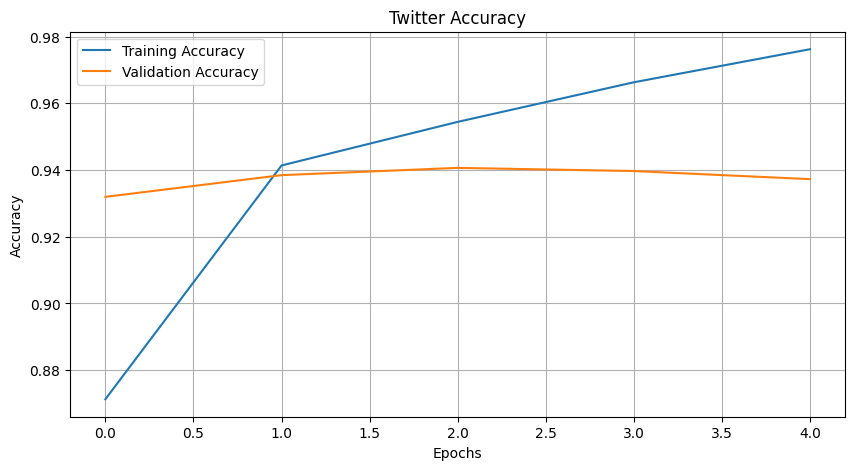

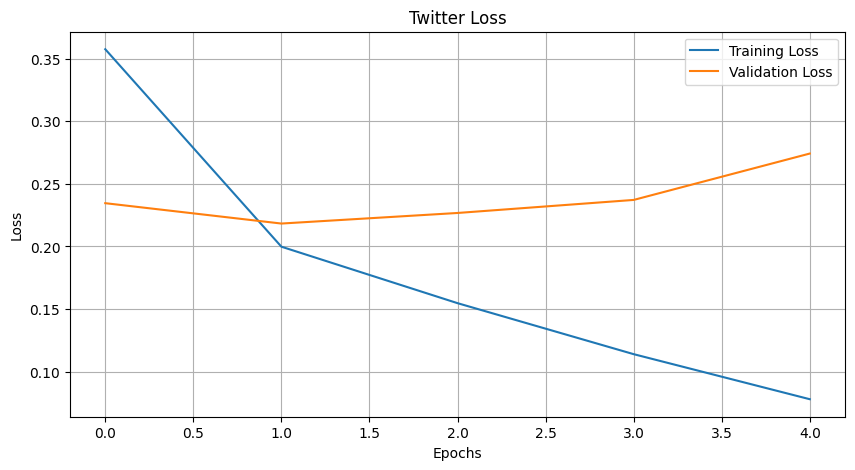

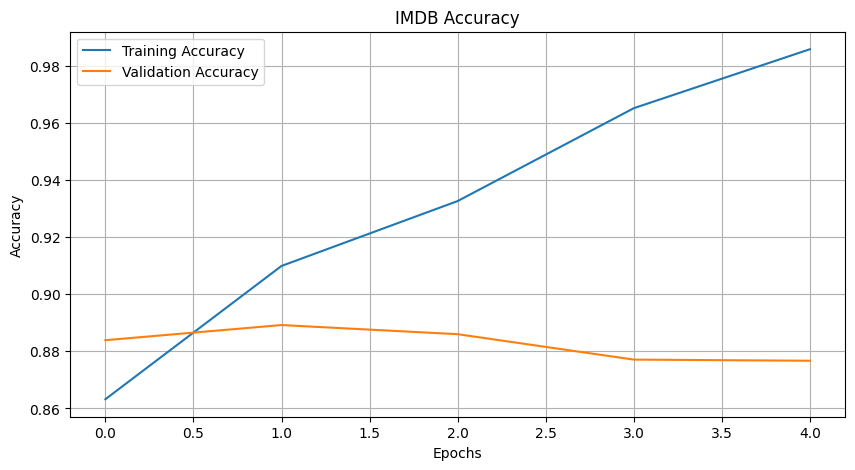

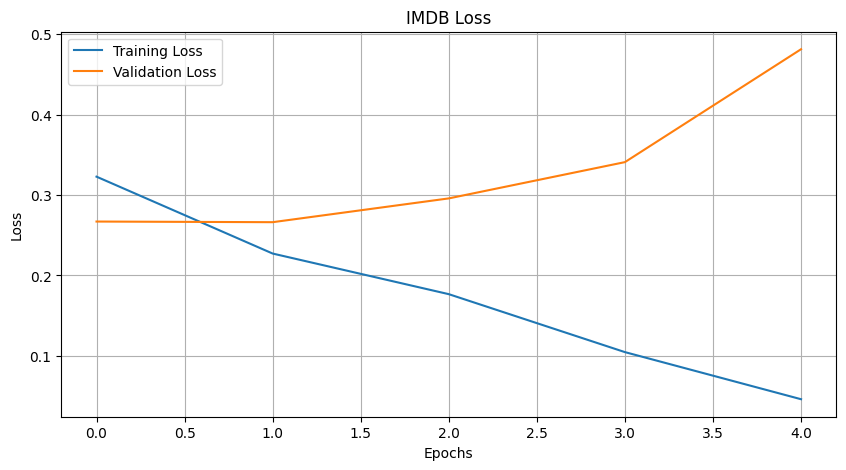

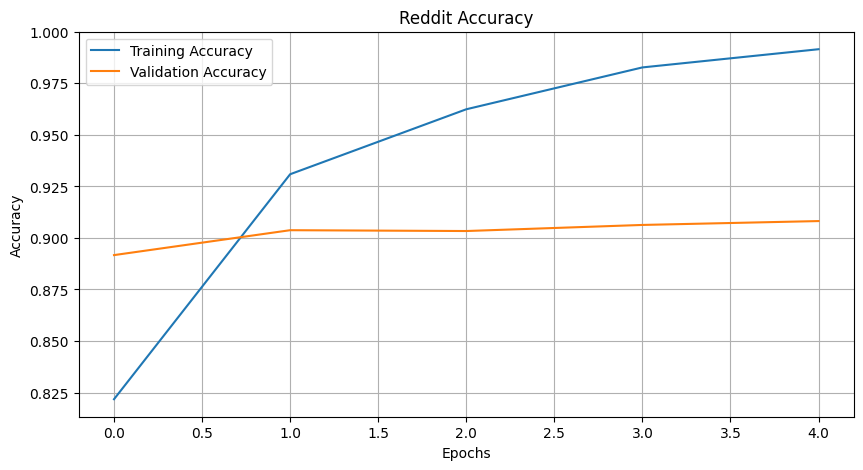

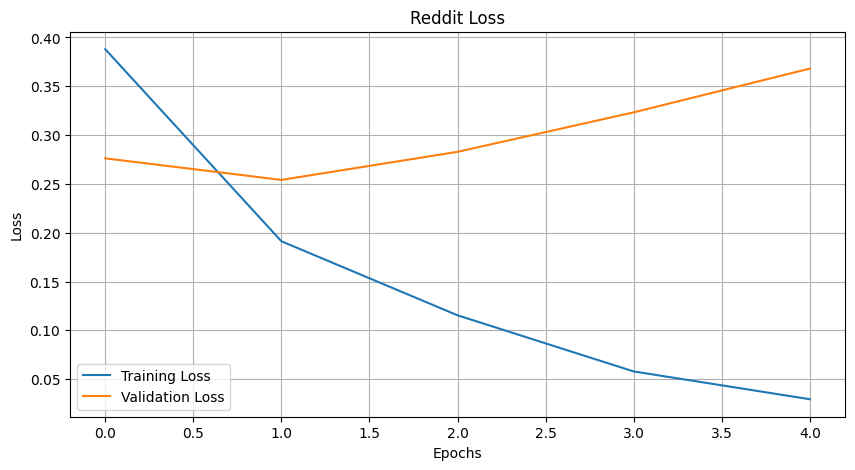

In [28]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_metrics(history, dataset_name):
    # Accuracy Plot
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{dataset_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Loss Plot
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{dataset_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Plot for each dataset
plot_metrics(history_twitter, "Twitter")
plot_metrics(history_imdb, "IMDB")
plot_metrics(history_reddit, "Reddit")
